In [104]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [164]:
data = pd.read_csv('observations-aggregate.csv')
data = data.sort_values(by=['N'])
x = data.iloc[:, 0].values.reshape(-1, 1)
y = data.iloc[:, 4].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

data.head()

,N,K,Samples,Avg Runtime,Max Runtime,Total Runtime,Std Dev,Makespan,IxJ
0,8,2,1,0.002672,0.002672,0.002672,0.00000,29,1x1
55,8,2,1,0.005254,0.005254,0.005254,0.00000,24,1x1
2,14,4,2,0.003631,0.006640,0.007261,0.00301,29,1x2
59,14,4,2,0.002701,0.005381,0.005402,0.00268,42,2x1
57,14,4,1,0.002141,0.002141,0.002141,0.00000,31,1x2


In [165]:
x.transpose()[0]

array([  8,   8,  14,  14,  14,  14,  20,  20,  20,  20,  26,  26,  26,
        26,  26,  26,  32,  32,  32,  32,  38,  38,  38,  38,  38,  38,
        38,  38,  44,  44,  44,  44,  50,  50,  50,  50,  50,  50,  50,
        50,  56,  56,  62,  62,  62,  62,  74,  74,  74,  74,  74,  74,
        74,  86,  86,  86,  86,  92,  92,  92,  92,  98,  98,  98,  98,
        98, 110, 110, 110, 110, 122, 122, 122, 122, 128, 128, 128, 128,
       146, 146, 146, 146, 146, 146, 146, 152, 152, 170, 170, 170, 170,
       182, 182, 194, 194, 194, 194, 212, 212, 212, 218, 218, 242, 242,
       242, 242, 254, 254, 254, 290, 290, 290, 296, 296])

In [166]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(x.reshape(-1, 1))

linear_regressor = LinearRegression()
linear_regressor.fit(poly_features, y)
# linear_regressor.fit(x, y)  # perform linear regression
y_pred = linear_regressor.predict(poly_features)  # make predictions

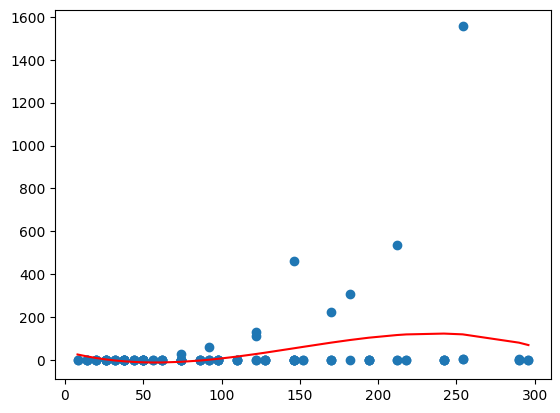

In [167]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [155]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(x, y_pred)


LinearRegression()

In [156]:
poly_reg_rmse = np.sqrt(mean_squared_error(y, y_pred))
poly_reg_rmse

26.224952315644195

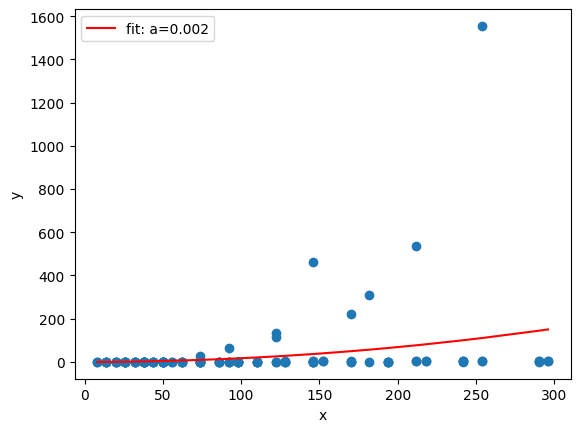

In [168]:
plt.scatter(x, y)
# plt.plot(x, y, 'b-', label='data')

def pred_n(x, a):
  return a * x

def pred_n2(x, a):
  return a * x**2

def pred_n3(x, a):
  return a * x**3

# (1/4) N (N + 1)^2
def pred_avg_of_n3(x, a):
  return a * x * (x + 1)**2

# (1/6) (N + 1) (2N + 1)
def pred_avg_of_n2(x, a):
  return a * (x + 1) * (2 * x + 1)

popt, pcov = curve_fit(pred_n2, x.transpose()[0], y.transpose()[0])

plt.plot(x.transpose()[0], pred_n2(x.transpose()[0], *popt), 'r-', label='fit: a=%5.3f' % tuple(popt))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [169]:
coefficient_of_dermination = r2_score(y, pred_n2(x.transpose()[0], *popt))
coefficient_of_dermination

0.054777280312306664

In [102]:
np.linalg.cond(pcov)

1.0